# **An Introduction to Clustering Algorithms in Python**
In data science, we often think about how to use data to make predictions on new data points. This is called “supervised learning.” Sometimes, however, rather than ‘making predictions’, we instead want to categorize data into buckets. This is termed “unsupervised learning.”

To illustrate the difference, let’s say we’re at a major pizza chain and we’ve been tasked with creating a feature in the order management software that will predict delivery times for customers. In order to achieve this, we are given a dataset that has delivery times, distances traveled, day of week, time of day, staff on hand, and volume of sales for several deliveries in the past. From this data, we can make predictions on future delivery times. This is a good example of supervised learning.

Now, let’s say the pizza chain wants to send out targeted coupons to customers. It wants to segment its customers into 4 groups: large families, small families, singles, and college students. We are given prior ordering data (e.g. size of order, price, frequency, etc) and we’re tasked with putting each customer into one of the four buckets. This would be an example of “unsupervised learning” since we’re not making predictions; we’re merely categorizing the customers into groups.

Clustering is one of the most frequently utilized forms of unsupervised learning. In this article, we’ll explore two of the most common forms of clustering: k-means and hierarchical.

# Understanding the K-Means Clustering Algorithm

Let’s look at how k-means clustering works. First, let me introduce you to my good friend, blobby; i.e. the make_blobs function in Python’s sci-kit learn library. We’ll create four random clusters using make_blobs to aid in our task.

(-15.0, 15.0)

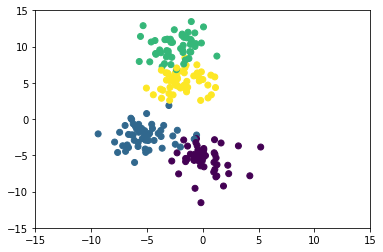

In [4]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# create blobs 
data = make_blobs(n_samples = 200, n_features= 2, centers= 4, cluster_std=1.6, random_state=50)

# create np array for data points 
points = data[0]

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c= data[1], cmap = 'viridis')
plt.xlim(-15,15)
plt.ylim(-15, 15)

# **Implementing K-Means Clustering in Python**

To run k-means in Python, we’ll need to import KMeans from sci-kit learn.

[[-2.40167949 10.17352695]
 [ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]
 [-5.56465793 -2.34988939]]


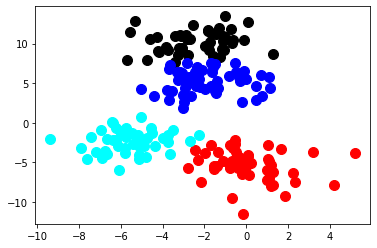

In [6]:
# import KMeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters =4)

# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

# save new clusters for chart 
y_km = kmeans.fit_predict(points)

#running the code in matplotlib
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

K-means is the most frequently used form of clustering due to its speed and simplicity. Another very common clustering method is hierarchical clustering.

# Implementing Agglomerative Hierarchical Clustering

Agglomerative hierarchical clustering differs from k-means in a key way. Rather than choosing a number of clusters and starting out with random centroids, we instead begin with every point in our dataset as a “cluster.” Then we find the two closest points and combine them into a cluster. Then, we find the next closest points, and those become a cluster. We repeat the process until we only have one big giant cluster.

Along the way, we create what’s called a dendrogram. This is our “history.” You can see the dendrogram for our data points below to get a sense of what’s happening.

Let’s see how agglomerative hierarchical clustering works in Python. First, let’s import the necessary libraries from scipy.cluster.hierarchy and sklearn.clustering.

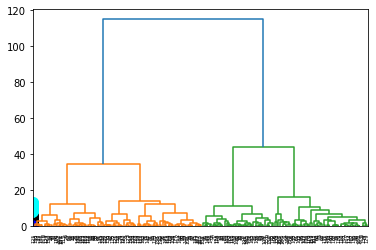

In [10]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save cluster for chart 
y_hc = hc.fit_predict(points)

# plot using matplotlib
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')

# DBSCAN clustering 
The following are the DBSCAN clustering algorithmic steps:

Step 1: Initially, the algorithms start by selecting a point (x) randomly from the data set and finding all the neighbor points within Eps from it. If the number of Eps-neighbours is greater than or equal to MinPoints, we consider x a core point. Then, with its Eps-neighbours, x forms the first cluster.
After creating the first cluster, we examine all its member points and find their respective Eps -neighbors. If a member has at least MinPoints Eps-neighbours, we expand the initial cluster by adding those Eps-neighbours to the cluster. This continues until there are no more points to add to this cluster.

Step 2: For any other core point not assigned to cluster, create a new cluster.

Step 3: To the core point cluster, find and assign all points that are recursively connected to it.

Step 4: Iterate through all unattended points in the dataset and assign them to the nearest cluster at Eps distance from themselves. If a point does not fit any available clusters, locate it as a noise point.

Python implementation of DBSCAN
As usual to any implementation, we get started with fetching the dataset and 

In [13]:
# Data preprocessing 
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("/content/Mall_Customers.csv") # importing the dataset

In [15]:
# Exploratory data analysis
# check head of data 
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# check the shape of dataset

print("Dataset Shape:", data.shape)



Dataset Shape: (200, 5)


In [17]:
# check if dataset has missing values 
data.isnull().any().any()

False

In [19]:
# extracting the above mentioned columns
x = data.loc[:, ['Annual Income (k$)',
                 'Spending Score (1-100)']].values
# print shape of x
print(x.shape)

(200, 2)


Before we apply the DBSCAN model, first, we need to obtain its two parameters.

MinPoints: We can obtain the minimum number of Points to be used to recognize a cluster, as follows:
If the dataset has two dimensions, use the min sample per cluster as 4.
If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension
Since our data is two-dimensional, we shall use the default value of 4 as our MinPoint parameter.

Epsilon (Eps): To calculate the value of Eps, we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours. After that, we sort them and finally plot them. From the plot, we identify the maximum value at the curvature of the graph. This value is our Eps.

# Compute data proximity from each other using Nearest Neighbours

In [22]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

# Sorting and plot the distances between the data points

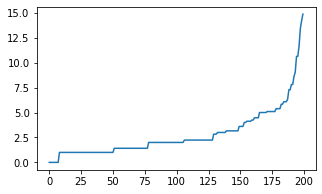

In [23]:
# Sort and plot the distances results

distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

From the above plot, we note the maximum curvature of the curve is about eight, and thus we picked our Eps as 8.

We now have our two parameters as:

MinPoints = 4
Eps = 8
Now that we have the parameters let us implement the DBSCAN model.

# Implementing the DBSCAN model

In [24]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

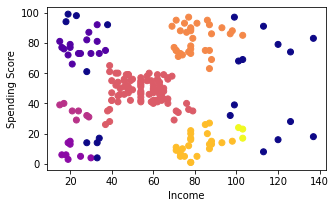

In [25]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot